In [1]:
import uproot
import pandas as pd
import numpy as np
import boost_histogram as bh
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
folder = '/eos/atlas/atlascerngroupdisk/perf-egamma/InclusivePhotons'
branches = ['evtWeight', 'y_passOQ', 'y_pt', 'y_eta', 'y_isTruthMatchedPhoton', 'y_convType', 'y_truth_convType', 'y_Rhad1', 'y_Rhad', 'y_Reta', 'y_weta2', 'y_Rphi', 'y_wtots1', 'y_weta1', 'y_fracs1', 'y_deltae', 'y_Eratio', 'y_f1']

In [3]:
#Loading in Files
gamjetfile = uproot.open(folder+'/mc21_gammajet_v02/PyPt17_mc21_800664.root')#, entrystop=1000)
jetjetfile = uproot.open(folder+'/mc21_jetjet_v02/Py8_jetjet_mc21_801279_p5057_Rel22_AB22.2.50_v02.root')#, entrystop=1000)

gamjetSP = gamjetfile['SinglePhoton']
jetjetSP = jetjetfile['SinglePhoton']

df_gjnotruth = gamjetSP.arrays(branches,library='pd')
df_jj = jetjetSP.arrays(branches,library='pd')

In [4]:
## ONLY SELECTING TRUTH MATCHED

df_gj = df_gjnotruth[df_gjnotruth.y_isTruthMatchedPhoton]

In [5]:
df_gj.index = list(range(len(df_gj)))

In [20]:
# hadleaklist = [False] * len(df_gj['y_eta'])
# for i in range(len(df_gj['y_eta'])):
# #     print(abs(df_gj['y_eta'][i]));print(i)
#     if (abs(df_gj['y_eta'][i]) < 0.8) or (abs(df_gj['y_eta'][i]) > 1.37):
#         hadleaklist[i] = df_gj['y_Rhad1'][i]
#     else:
#         hadleaklist[i] = df_gj['y_Rhad'][i]
        
# hadleaklist
# df_gj['HadLeakage'] = hadleaklist

In [7]:
def makehadlist(df_name):
    '''df_name is the dataframe'''
    
    hadleaklist = [False] * len(df_name['y_eta'])
    
    for i in range(len(df_name['y_eta'])):
        if abs(df_name['y_eta'][i]) < 0.8 or abs(df_name['y_eta'][i]) > 1.37:
            hadleaklist[i] = df_name['y_Rhad1'][i]
        else:
            hadleaklist[i] = df_name['y_Rhad'][i]
         
    return hadleaklist
        

In [8]:
df_jj['HadLeakage'] = makehadlist(df_jj)
df_gj['HadLeakage'] = makehadlist(df_gj)

/tmp/ipykernel_820/4128610647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gj['HadLeakage'] = makehadlist(df_gj)


In [9]:
df_gj

,evtWeight,y_passOQ,y_pt,y_eta,y_isTruthMatchedPhoton,y_convType,y_truth_convType,y_Rhad1,y_Rhad,y_Reta,y_weta2,y_Rphi,y_wtots1,y_weta1,y_fracs1,y_deltae,y_Eratio,y_f1,HadLeakage
0,1.0,True,409.209595,1.753538,True,0,0,0.002945,0.004472,0.964968,0.009346,0.978234,2.002914,0.583963,0.207605,43.101593,0.989079,0.081320,0.002945
1,1.0,True,315.108459,0.265245,True,0,1,0.007725,0.008007,0.975056,0.008734,0.988232,1.719431,0.554444,0.203250,46.003128,0.989451,0.097205,0.007725
2,1.0,True,470.509003,1.089436,True,4,1,-0.000352,-0.003068,0.961069,0.010051,0.966097,2.142255,0.638442,0.308223,0.000000,0.998809,0.218940,-0.003068
3,1.0,True,317.702118,-0.267235,True,0,0,0.004741,0.009505,0.976663,0.008390,0.984343,1.783198,0.550030,0.177771,26.000320,0.939906,0.056986,0.004741
4,1.0,True,292.126465,0.317192,True,3,1,0.001473,0.001446,0.970260,0.008896,0.981166,1.699356,0.593774,0.181963,9.999687,0.995281,0.196796,0.001473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275234,1.0,True,323.109375,-1.064562,True,2,1,0.002994,0.002735,0.961619,0.009865,0.973804,2.317394,0.625434,0.314538,28.102066,0.990079,0.178485,0.002735
2275235,1.0,True,294.888763,-1.888014,True,3,1,-0.000627,-0.000262,0.943420,0.010265,0.965883,1.660011,0.573416,0.202290,7.000000,0.987520,0.240984,-0.000627
2275236,1.0,True,342.173950,1.197824,True,0,0,-0.001770,-0.001742,0.960052,0.009196,0.974733,2.107327,0.582758,0.223551,71.998444,0.990309,0.051357,-0.001742
2275237,1.0,True,456.778595,-1.523358,True,0,0,0.007056,0.006766,0.973274,0.008938,0.983277,1.997238,0.633109,0.261097,14.918236,0.993593,0.098071,0.007056


In [19]:
##SAVE TO PICKLE FILE
import pickle

file_path1 = 'df_gj_test.pickle'
file_path2 = 'df_jj_test.pickle'

# Open the file in binary mode
with open(file_path1, 'wb') as file:
    # Dump the data to the file
    pickle.dump(df_gj, file)
with open(file_path2, 'wb') as file:
    pickle.dump(df_jj, file)

In [9]:
# #create HadLEakage variable
# df_jj['HadLeakage'] = df_jj['y_Rhad1'] if (df_jj['y_eta'] < 0.8) else df_jj['y_Rhad']

In [12]:
filllist = [False] *10
filllist[5] = 2
filllist

[False, False, False, False, False, 2, False, False, False, False]

In [10]:
# Histogram Style (ATLAS)
import matplotlib.pyplot as plt
plt.style.use('/eos/user/k/kyklazek/ATLAS.mplstyle') 

import matplotlib.font_manager as font_manager
font_dirs = ['/eos/user/k/kyklazek/helvetica_font/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    try:
        font_manager.fontManager.addfont(font_file)
        print ("added",font_file)
    except:
        print("cannot add",font_file)
#font_manager.fontManager.ttflist.extend(font_list)

added /eos/user/k/kyklazek/helvetica_font/HelveticaBoldOblique.ttf
cannot add /eos/user/k/kyklazek/helvetica_font/Helvetica_4.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_2.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_1.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaLight.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaOblique.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_0.ttf
added /eos/user/k/kyklazek/helvetica_font/Helvetica_3.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaBold.ttf
added /eos/user/k/kyklazek/helvetica_font/HelveticaLightOblique.ttf


In [11]:
# from atlasplots import *
# atlasstyle()

In [12]:
def ATLAShist(hist1,hist2,label='variable name',minmax=[-2,2],figname=False,log=True,norm=True):
    '''
    right now, hist1 is for single photons (gj), hist2 is for fakes (jj)  - boosthistograms
    
    minmax is for x axis: minmax=[minx,maxx]   -  list or tuple
    
    label is variable name. ex.: label=r"$R_{had1}$"
    
    figname is name of .pdf file, if anything is written in.
    
    ***STILL TO DO:***
                - maybe add a **kwargs functionality for things like colors, legend labels etc. (how to have a default val.?)
                - Figure out consistency of top/ bottom for
                                    - log=True, norm=False
                                    - log=False
                - Figure out ATLAS label for log=False
                - add in number for 'xx fb^-1'
                - maybe add option for dpi/format change for savefig
    '''
    
    integral1 = hist1.sum().value
    integral2 = hist2.sum().value
    minn = minmax[0]
    maxx = minmax[1]
    
    plt.close('all')
    plt.figure(figsize=(9,6))
    
    # draw errobars, use the sqrt error. You can use what you want there
    # poissonian 1 sigma intervals would make more sense
    if norm==True:
        plt.errorbar(hist1.axes[0].centers, hist1.view().value/integral1, yerr=np.sqrt(hist1.view().variance)/integral1,
                 fmt='^',mec='purple',mfc='purple',ecolor='purple',ms=7,label=r'single $\gamma$')
        plt.errorbar(hist2.axes[0].centers, hist2.view().value/integral2, yerr=np.sqrt(hist2.view().variance)/integral2,
                 fmt='ro',mec='skyblue',mfc='skyblue',ecolor='skyblue',ms=7,label=r'fake photons')
    elif norm==False:
        plt.errorbar(hist1.axes[0].centers, hist1.view().value, yerr=np.sqrt(hist1.view().variance),
                 fmt='^',mec='purple',mfc='purple',ecolor='purple',ms=7,label=r'single $\gamma$')
        plt.errorbar(hist2.axes[0].centers, hist2.view().value, yerr=np.sqrt(hist2.view().variance),
                 fmt='ro',mec='skyblue',mfc='skyblue',ecolor='skyblue',ms=7,label=r'fake photons')
    else:
        print('Please choose True or False for input norm')
        return


    ax = plt.gca()
    ax.set_xlabel(label,position=(1,1),horizontalalignment='right')
    if norm==True:
        ax.set_ylabel("Fraction of Events",position=(0,1),horizontalalignment='right')
    elif norm==False:
        ax.set_ylabel("Number of Events",position=(0,1),horizontalalignment='right')
    ax.legend()
    if log==True:
        plt.yscale('log')
    
    if log==True:
        if norm==True:
            top = 20*max(max(hist1.view().value/integral1),max(hist2.view().value/integral2))
            bottom = 0.000001;
        elif norm==False:
            top = 25*max(max(hist1.view().value),max(hist2.view().value))
            bottom = 0.1;
        left = minn; right = maxx
        ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)
    elif log==False:
        if norm==True:
            top = 1.1*max(hist1.view().value/integral1)
            bottom = 0;
        elif norm==False:
            top = 1.8*max(max(hist1.view().value),max(hist2.view().value))
            bottom = 0;
        left = minn; right = maxx
        ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)
    else:
        print('Please choose True or False for input log')
        return

    if log==True:
        ax.text((right-left)*0.02+left, (top-bottom)*0.3+bottom, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
        ax.text((right-left)*0.165+left, (top-bottom)*0.3+bottom, 'Simulation Internal',fontsize=20,horizontalalignment='left')
        ax.text((right-left)*0.02+left, (top-bottom)*0.10+bottom, r'$\sqrt{s} =$'+'13.6 TeV, xx fb'+r'$^{-1}$',fontsize=20,horizontalalignment='left')
    elif log==False:
        print('have not figured out ATLAS Label for non-log yet')
        
    if bool(figname)==True:
        plt.savefig(figname+'.png',dpi=360,format='png')
        
    plt.show()
    
        
    return

In [13]:
def ATLAShist4(hist1,hist2,h1nc,h2nc,label='variable name',minmax=[-2,2],figname=False,log=True,norm=True,totalnorm=False):
    '''
    right now, hist1 is for converted single photons (gj), hist2 is for converted fakes (?) (jj)  - boosthistograms
    and h1nc is nonconverted single photons, h2nc is nonconverted fakes
    
    minmax is for x axis: minmax=[minx,maxx]   -  list or tuple
    
    label is variable name. ex.: label=r"$R_{had1}$"
    
    figname is name of .pdf file, if anything is written in. If left False, no file will be created
    
    totalnorm = True divides the converted and unconverted rates by total: (sum of conv. & unconv.)
    
    ***STILL TO DO:***
                - maybe add a **kwargs functionality for things like colors, legend labels etc. (how to have a default val.?)
                - FIX norm==False and log==False
                - Figure out consistency of top/ bottom for
                                    - log=True, norm=False
                                    - log=False
                - Figure out ATLAS label for log=False
                - add in number for 'xx fb^-1'
                - maybe add option for dpi/format change for savefig
    '''
    
    integral1 = hist1.sum().value
    integral2 = hist2.sum().value
    integral1nc = h1nc.sum().value
    integral2nc = h2nc.sum().value
    minn = minmax[0]
    maxx = minmax[1]
    
    if totalnorm==True:
        integral1 = integral1 + integral1nc
        integral2 = integral2 + integral2nc
        integral1nc = integral1
        integral2nc = integral2
    
    plt.close('all')
    plt.figure(figsize=(9,6))
    
    # draw errobars, use the sqrt error. You can use what you want there
    # poissonian 1 sigma intervals would make more sense
    if norm==True:
        plt.errorbar(hist1.axes[0].centers, hist1.view().value/integral1, yerr=np.sqrt(hist1.view().variance)/integral1,
                 fmt='^',mec='purple',mfc='purple',ecolor='purple',ms=7,label=r'single $\gamma$ conv.')
        plt.errorbar(hist2.axes[0].centers, hist2.view().value/integral2, yerr=np.sqrt(hist2.view().variance)/integral2,
                 fmt='ro',mec='skyblue',mfc='skyblue',ecolor='skyblue',ms=7,label=r'fake photons conv.')
        plt.errorbar(h1nc.axes[0].centers, h1nc.view().value/integral1nc, yerr=np.sqrt(h1nc.view().variance)/integral1nc,
                 fmt='^',mec='purple',mfc='none',ecolor='purple',ms=7,label=r'single $\gamma$ non-conv.')
        plt.errorbar(h2nc.axes[0].centers, h2nc.view().value/integral2nc, yerr=np.sqrt(h2nc.view().variance)/integral2nc,
                 fmt='ro',mec='skyblue',mfc='none',ecolor='skyblue',ms=7,label=r'fake photons non-conv.')
    elif norm==False:
        plt.errorbar(hist1.axes[0].centers, hist1.view().value, yerr=np.sqrt(hist1.view().variance),
                 fmt='^',mec='purple',mfc='purple',ecolor='purple',ms=7,label=r'single $\gamma$')
        plt.errorbar(hist2.axes[0].centers, hist2.view().value, yerr=np.sqrt(hist2.view().variance),
                 fmt='ro',mec='skyblue',mfc='skyblue',ecolor='skyblue',ms=7,label=r'fake photons')
    else:
        print('Please choose True or False for input norm')
        return


    ax = plt.gca()
    ax.set_xlabel(label,position=(1,1),horizontalalignment='right')
    if norm==True:
        ax.set_ylabel("Fraction of Events",position=(0,1),horizontalalignment='right')
    elif norm==False:
        ax.set_ylabel("Number of Events",position=(0,1),horizontalalignment='right')
    ax.legend()
    if log==True:
        plt.yscale('log')
    
    if log==True:
        if norm==True:
            top = 20*max(max(hist1.view().value/integral1),max(hist2.view().value/integral2))
            bottom = 0.000001;
        elif norm==False:
            top = 25*max(max(hist1.view().value),max(hist2.view().value))
            bottom = 0.1;
        left = minn; right = maxx
        ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)
    elif log==False:
        if norm==True:
            top = 1.1*max(hist1.view().value/integral1)
            bottom = 0;
        elif norm==False:
            top = 1.8*max(max(hist1.view().value),max(hist2.view().value))
            bottom = 0;
        left = minn; right = maxx
        ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)
    else:
        print('Please choose True or False for input log')
        return

    if log==True:
        ax.text((right-left)*0.02+left, (top-bottom)*0.3+bottom, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
        ax.text((right-left)*0.165+left, (top-bottom)*0.3+bottom, 'Simulation Internal',fontsize=20,horizontalalignment='left')
        ax.text((right-left)*0.02+left, (top-bottom)*0.10+bottom, r'$\sqrt{s} =$'+'13.6 TeV, xx fb'+r'$^{-1}$',fontsize=20,horizontalalignment='left')
    elif log==False:
        print('have not figured out ATLAS Label for non-log yet')
        
    if bool(figname)==True:
        plt.savefig(figname+'.png',dpi=360,format='png')
        
    plt.show()
    
        
    return

In [41]:
# ATLAShist?

plt.errorbar?

In [14]:
def makebh(branchname,minmax,bins=100,convert=False):
    '''makes bh historgrams
    
    with ***data frame variable names df_gj and df_jj***
    
    minmax = (minx,maxx)
    
    returns gamma-jet histogram and jet-jet histogram, in that order
    
    if want only converted photons, put in convert = 0
    if want only unconverted phots., put in convert = 1
    
    '''
    
    
    minn = minmax[0]
    maxx = minmax[1]
    
    
    histgj = bh.Histogram(bh.axis.Regular(bins,minn,maxx),storage=bh.storage.Weight()) 
    

    histjj = bh.Histogram(bh.axis.Regular(bins,minn,maxx),storage=bh.storage.Weight()) 
    
    
    if convert == 0:
        exec('histgj.fill(df_gj.'+branchname+'[df_gj.y_convType == 0], weight=df_gj.evtWeight[df_gj.y_convType == 0])')
        exec('histjj.fill(df_jj.'+branchname+'[df_jj.y_convType == 0], weight=df_jj.evtWeight[df_jj.y_convType == 0])')
    elif convert == 1:
        exec('histgj.fill(df_gj.'+branchname+'[df_gj.y_convType > 0], weight=df_gj.evtWeight[df_gj.y_convType > 0])')
        exec('histjj.fill(df_jj.'+branchname+'[df_jj.y_convType > 0], weight=df_jj.evtWeight[df_jj.y_convType > 0])')
    else:
        exec('histgj.fill(df_gj.'+branchname+', weight=df_gj.evtWeight)')
        exec('histjj.fill(df_jj.'+branchname+', weight=df_jj.evtWeight)')
    
    return histgj, histjj

In [15]:
def genmakebh(df_name,branchname,minmax,bins=100,boolslice='',weightname='evtWeight'):
    '''a general version of 'makebh', spits out only one boostHistogram
    
    df_name is the name of the dataframe (str)
    branchname is the name of the wanted branch (str)
    minmax is a tuple: (min,max) = (float,float)
    bins is the number of bins (int)
    boolslice is an optional boolean (str) argument, if a slice of the data is wanted,
        for example: boolslice='[df_gj.y_convType == 0]' for converted
        
    FIX THIS TO TAKE ACTUAL DATAFRAME NOT JUST NAME
        
    '''
    minn = minmax[0]
    maxx = minmax[1]
    
    histo = bh.Histogram(bh.axis.Regular(bins,minn,maxx),storage=bh.storage.Weight()) 
    
    exec('histo.fill('+df_name+'.'+branchname+boolslice+', weight='+df_name+'.'+weightname+boolslice+')')
    
    return histo
    

In [16]:
def goodmakebh(df_name,branchname,minmax,bins=100,boolslice='',weightname='evtWeight'):
    '''a general version of 'makebh', spits out only one boostHistogram
    
    df_name is the the dataframe (pandas DataFrame)
    branchname is the name of the wanted branch (str)
    minmax is a tuple: (min,max) = (float,float)
    bins is the number of bins (int)
    boolslice is an optional boolean (str) argument, if a slice of the data is wanted,
        for example: boolslice='[df_gj.y_convType == 0]' for converted
        
    DIFFERENCE FROM genmakebh: takes actual DataFrame, not just str of name
    '''
    minn = minmax[0]
    maxx = minmax[1]
    
    histo = bh.Histogram(bh.axis.Regular(bins,minn,maxx),storage=bh.storage.Weight()) 
    
    exec('histo.fill(df_name[branchname]'+boolslice+', weight=df_name[weightname]'+boolslice+')')
    
    return histo

In [13]:
# makebh?

a=len(df_gj.y_Rhad[df_gj.y_convType == 0])
b=len(df_gj.y_Rhad[df_gj.y_convType > 0])
c=len(df_gj.y_Rhad)

a,b,c,a+b,a/c

(1598904, 676335, 2275239, 2275239, 0.70274111862534)

In [25]:
branchlist = []
labellist = []
minmaxlist = []

In [26]:
branchname = 'y_Rhad1'
label = r'$R_{had1}$'
minmax = (-.5,5)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [27]:
branchname = 'y_Rhad'
label = r'$R_{had}$'
minmax = (-.5,5)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [28]:
branchname = 'y_Reta'
label = r'$R_{\eta}$'
minmax = (0.1,1.25)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [29]:
branchname = 'y_Rphi'
label = r'$R_{\phi}$'
minmax = (0.1,1.25)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [30]:
branchname = 'y_weta2'
label = r'$w_{\eta_2}$'
minmax = (0.002,0.023)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [31]:
branchname = 'y_wtots1'
label = r'$w_{s \hspace{.4} tot}$'
minmax = (-.2,15)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [32]:
branchname = 'y_weta1'
label = r'$w_{s \hspace{.4}3}$'
minmax = (0,.9)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [33]:
branchname = 'y_fracs1'
label = r'$f_{side}$'
minmax = (-.2,2)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [34]:
branchname = 'y_deltae'
label = r'$\Delta E_s$'
minmax = (-200,4000)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [35]:
branchname = 'y_Eratio'
label = r'$E_{ratio}$'
minmax = (-.3,1.1)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [36]:
branchname = 'y_f1'
label = r'$f_1$'
minmax = (-.05,.9)
# hist1,hist2 = makebh(branchname,minmax)
# ATLAShist(hist1,hist2,label,minmax,branchname)
branchlist.append(branchname); labellist.append(label); minmaxlist.append(minmax)

In [37]:
branchlist, labellist, minmaxlist

(['y_Rhad1',
  'y_Rhad',
  'y_Reta',
  'y_Rphi',
  'y_weta2',
  'y_wtots1',
  'y_weta1',
  'y_fracs1',
  'y_deltae',
  'y_Eratio',
  'y_f1'],
 ['$R_{had1}$',
  '$R_{had}$',
  '$R_{\\eta}$',
  '$R_{\\phi}$',
  '$w_{\\eta_2}$',
  '$w_{s \\hspace{.4} tot}$',
  '$w_{s \\hspace{.4}3}$',
  '$f_{side}$',
  '$\\Delta E_s$',
  '$E_{ratio}$',
  '$f_1$'],
 [(-0.5, 5),
  (-0.5, 5),
  (0.1, 1.25),
  (0.1, 1.25),
  (0.002, 0.023),
  (-0.2, 15),
  (0, 0.9),
  (-0.2, 2),
  (-200, 4000),
  (-0.3, 1.1),
  (-0.05, 0.9)])

In [17]:
branchlist = ['y_Rhad1',
  'y_Rhad',
  'y_Reta',
  'y_Rphi',
  'y_weta2',
  'y_wtots1',
  'y_weta1',
  'y_fracs1',
  'y_deltae',
  'y_Eratio',
  'y_f1']

labellist = [r'$R_{had1}$',
  r'$R_{had}$',
  r'$R_{\eta}$',
  r'$R_{\phi}$',
  r'$w_{\eta_2}$',
  r'$w_{s \hspace{.4} tot}$',
  r'$w_{s \hspace{.4}3}$',
  r'$f_{side}$',
  r'$\Delta E_s$',
  r'$E_{ratio}$',
  r'$f_1$']

minmaxlist =[(-0.5, 5),
  (-0.5, 5),
  (0.1, 1.25),
  (0.1, 1.25),
  (0.002, 0.023),
  (-0.2, 15),
  (0, 0.9),
  (-0.2, 2),
  (-200, 4000),
  (-0.3, 1.1),
  (-0.05, 0.9)]

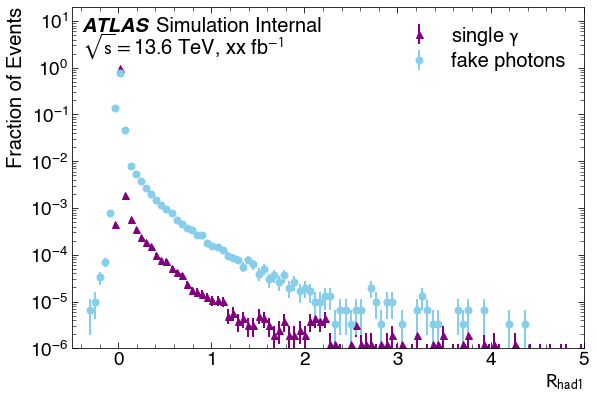

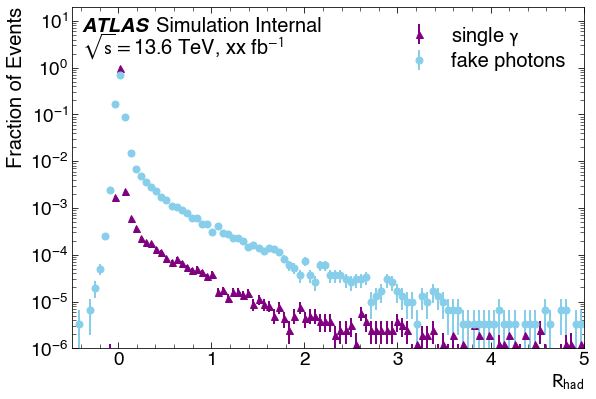

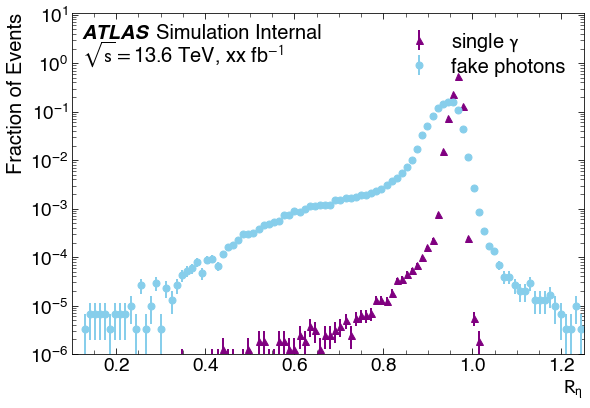

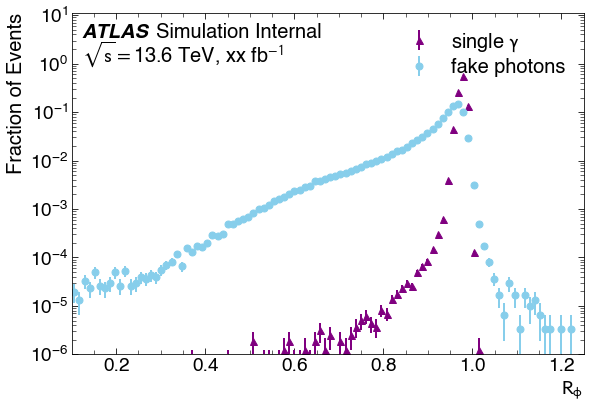

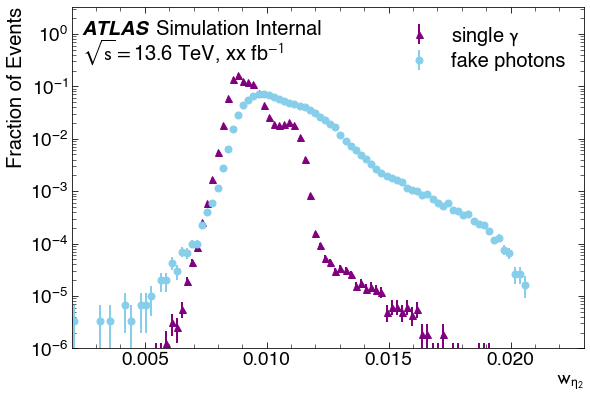

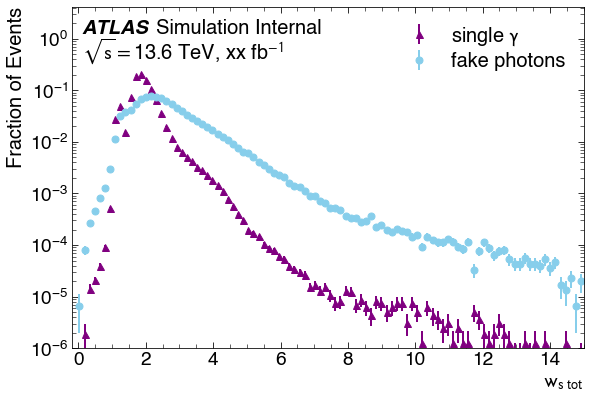

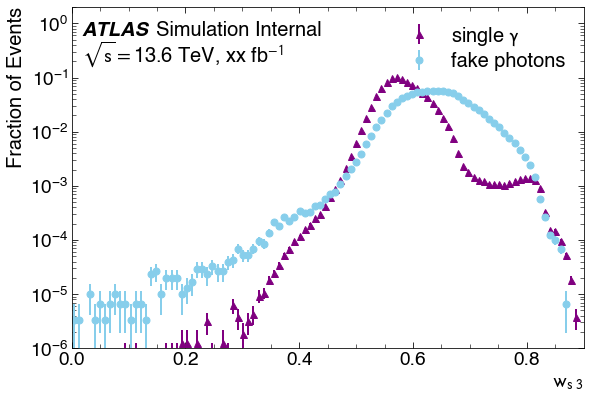

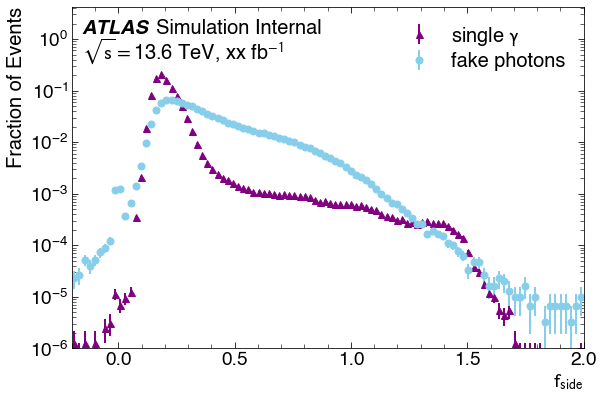

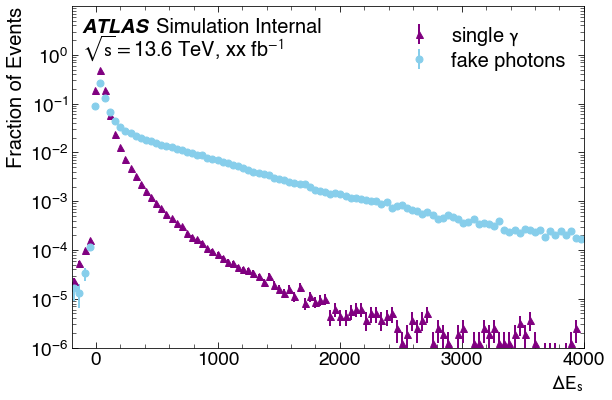

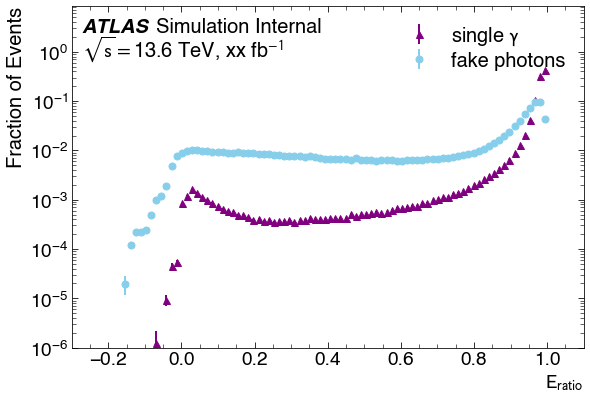

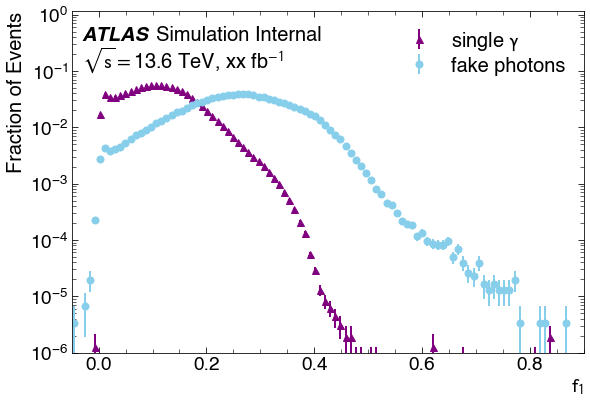

In [38]:
for i in range(len(branchlist)):
    branchname = branchlist[i]
    label = labellist[i]
    minmax = minmaxlist[i]
    hist1,hist2 = makebh(branchname,minmax)
    ATLAShist(hist1,hist2,label,minmax,'truthmatched/'+branchname+'_true')

In [39]:
# #converted:
# for i in range(len(branchlist)):
#     branchname = branchlist[i]
#     label = labellist[i]
#     minmax = minmaxlist[i]
#     hist1,hist2 = makebh(branchname,minmax,convert=0)
#     ATLAShist(hist1,hist2,label,minmax,'truthmatched/conv_'+branchname+'_true')


In [40]:
# #unconverted
# for i in range(len(branchlist)):
#     branchname = branchlist[i]
#     label = labellist[i]
#     minmax = minmaxlist[i]
#     hist1,hist2 = makebh(branchname,minmax,convert=1)
#     ATLAShist(hist1,hist2,label,minmax,'loopplots/unconv_'+branchname+'_true')


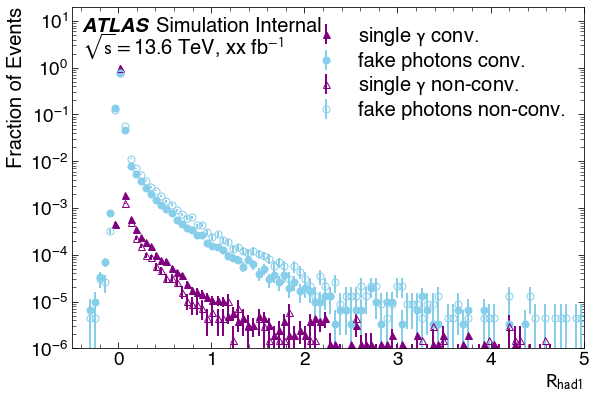

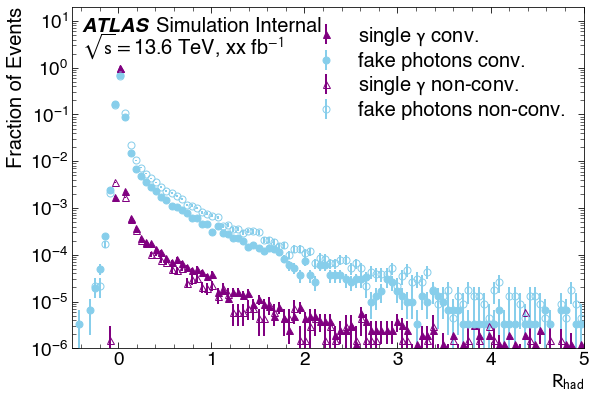

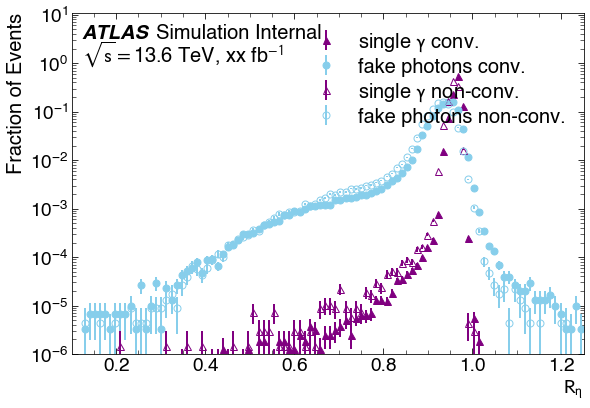

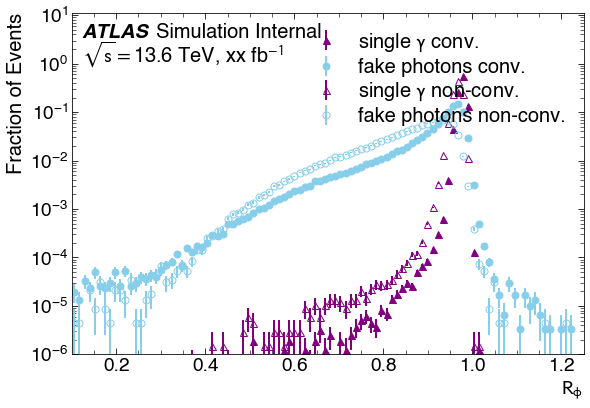

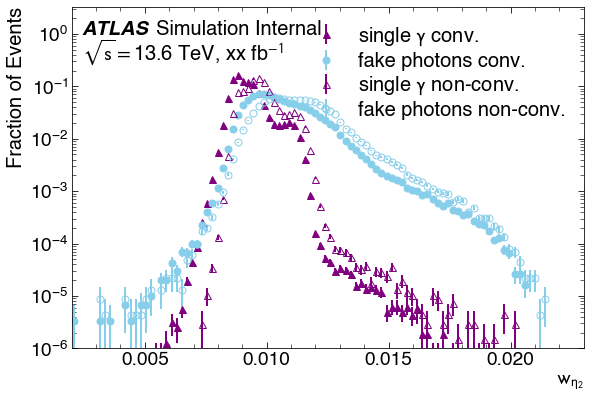

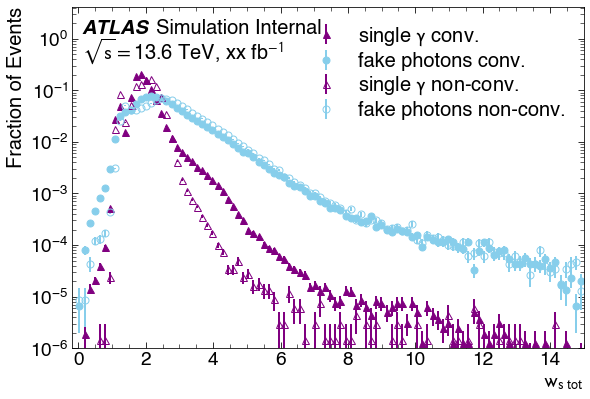

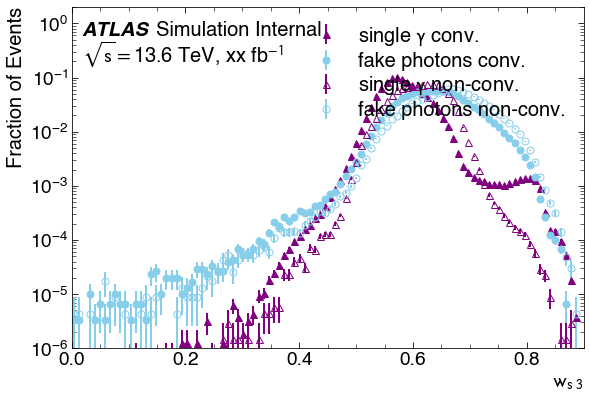

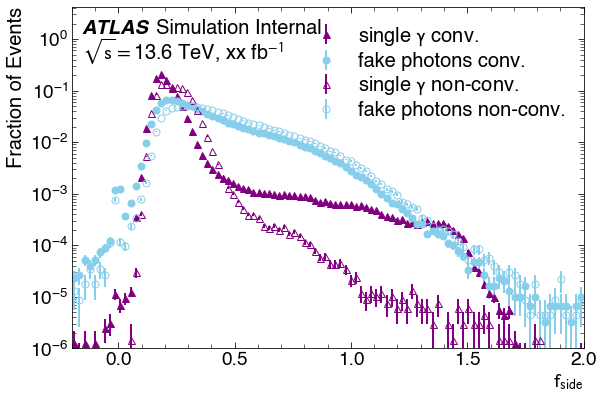

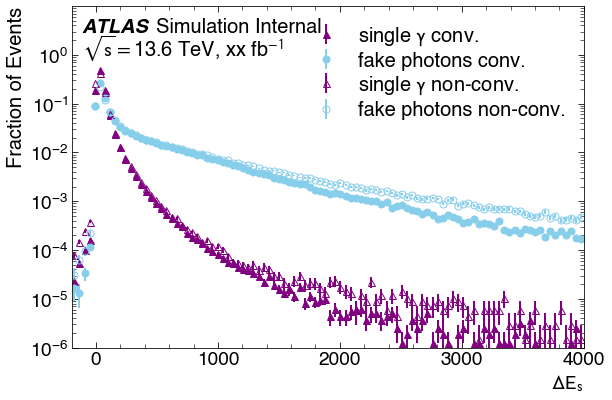

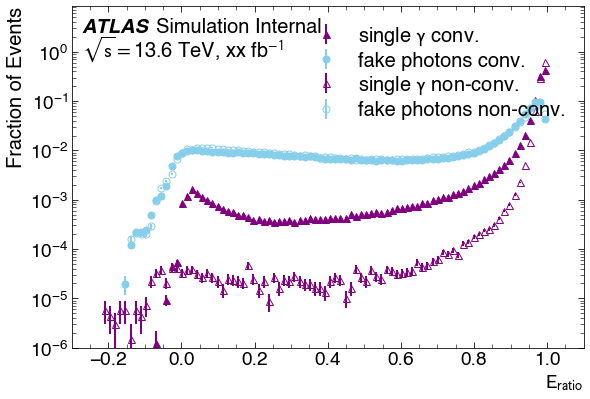

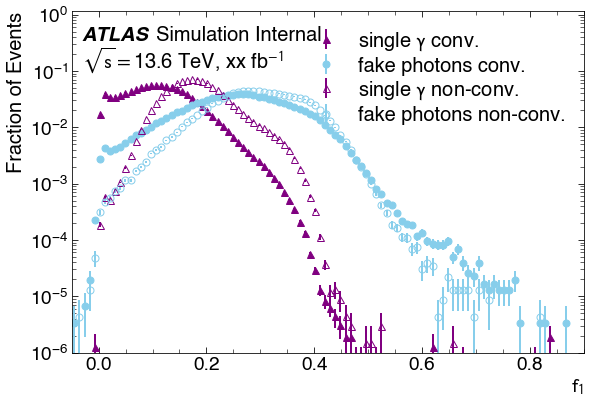

In [46]:
#converted and unconverted on same plot
for i in range(len(branchlist)):
    branchname = branchlist[i]
    label = labellist[i]
    minmax = minmaxlist[i]
    hist1c,hist2c = makebh(branchname,minmax,convert=0)
    hist1nc,hist2nc = makebh(branchname,minmax,convert=1)
    ATLAShist4(hist1c,hist2c,hist1nc,hist2nc,label,minmax,'truthmatched/conv_'+branchname+'_true')

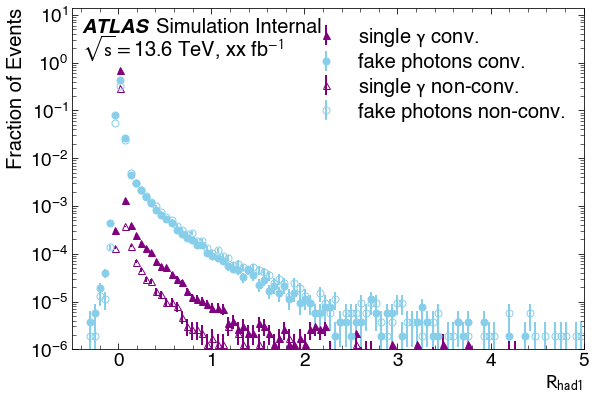

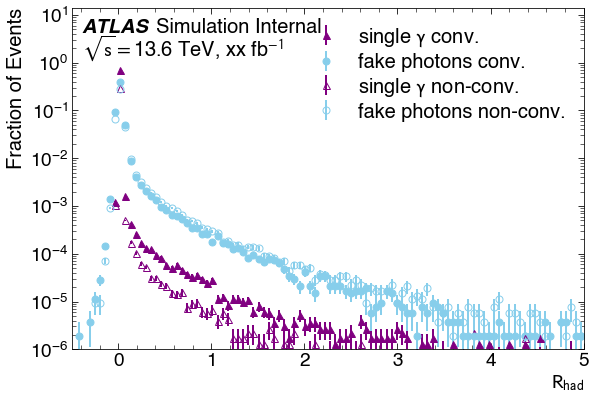

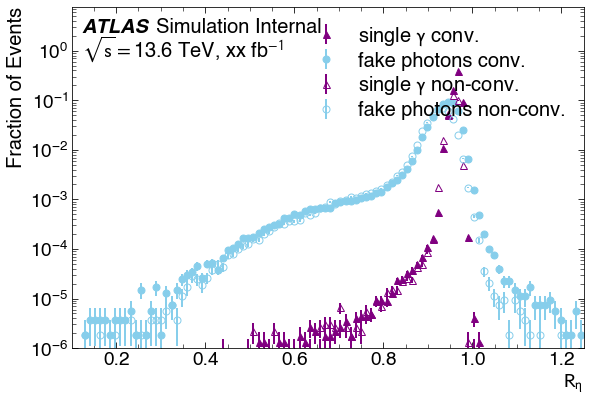

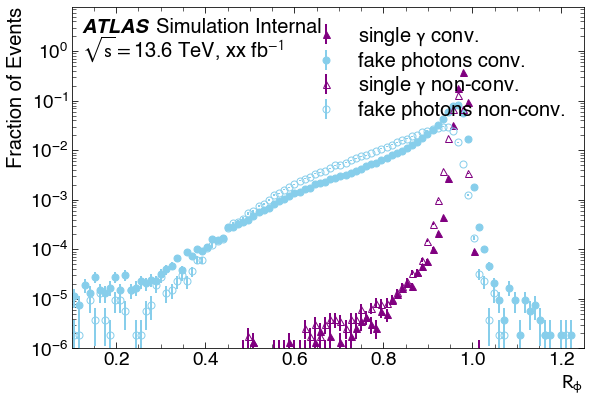

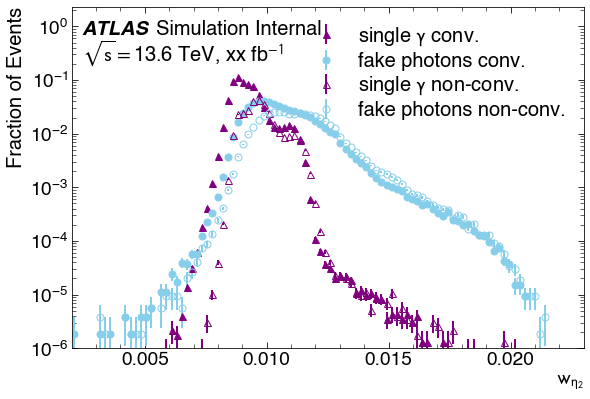

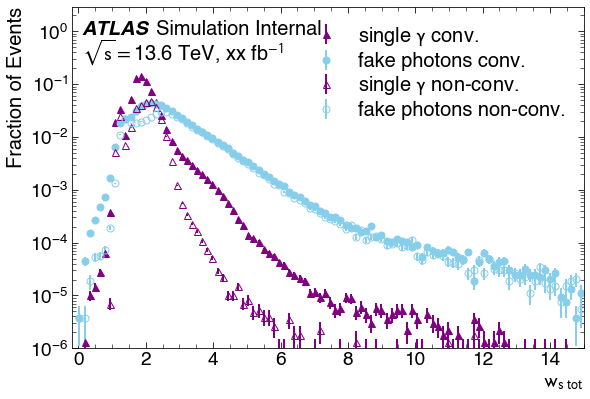

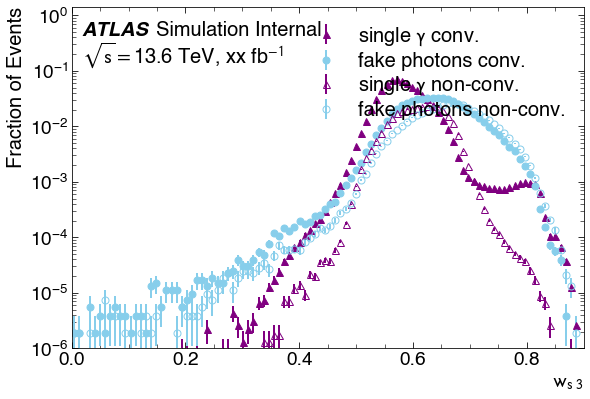

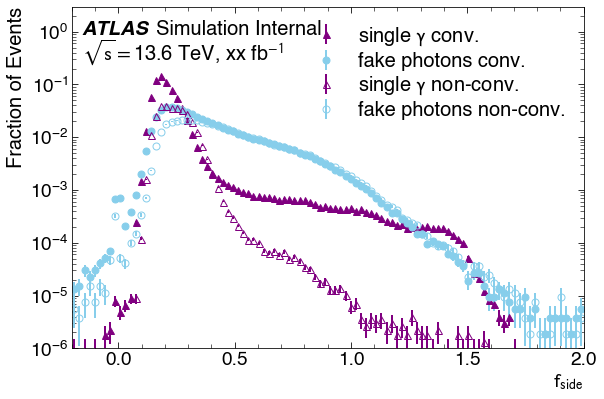

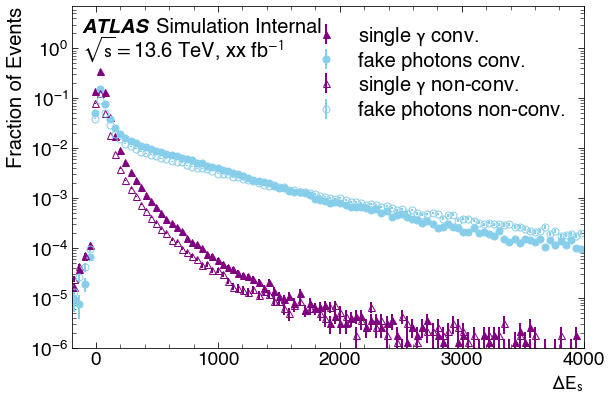

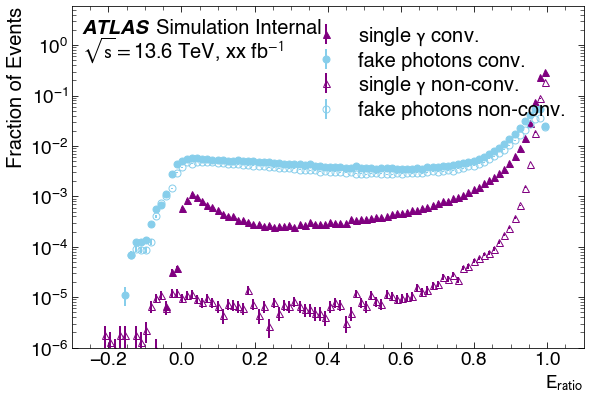

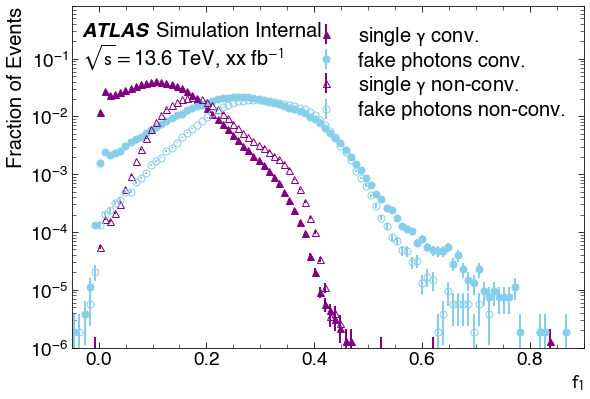

In [49]:
#totalnorm
for i in range(len(branchlist)):
    branchname = branchlist[i]
    label = labellist[i]
    minmax = minmaxlist[i]
    hist1c,hist2c = makebh(branchname,minmax,convert=0)
    hist1nc,hist2nc = makebh(branchname,minmax,convert=1)
    ATLAShist4(hist1c,hist2c,hist1nc,hist2nc,label,minmax,'truthmatched/conv_'+branchname+'_totalnorm',totalnorm=True)

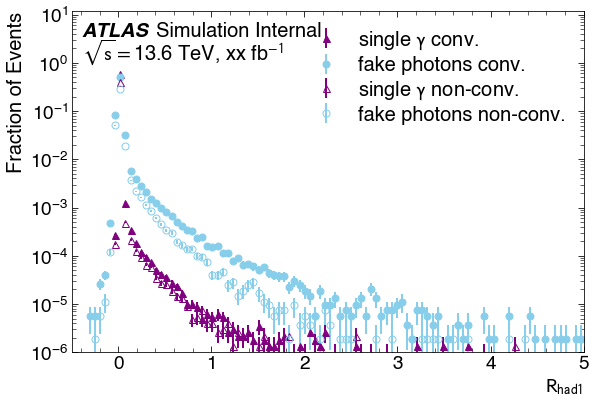

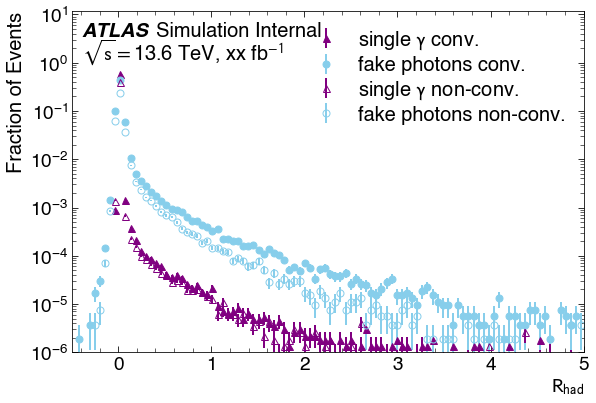

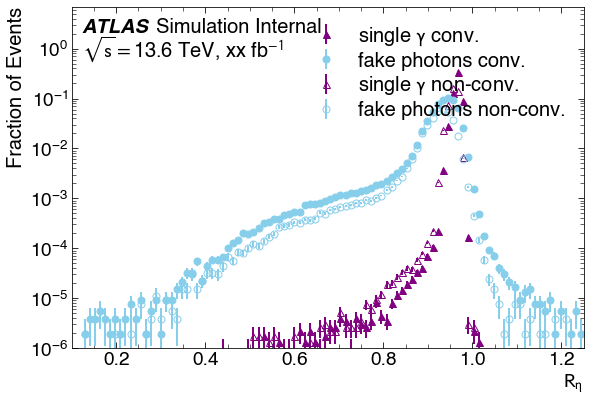

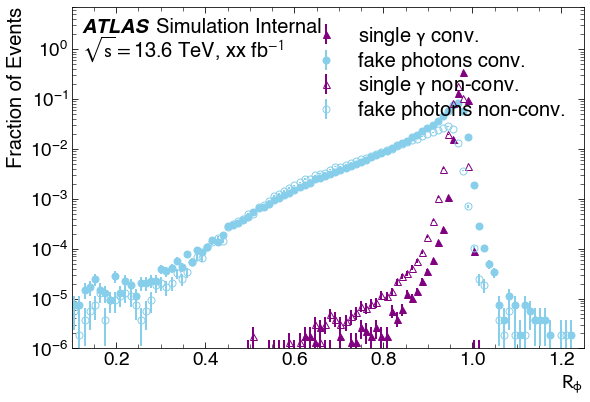

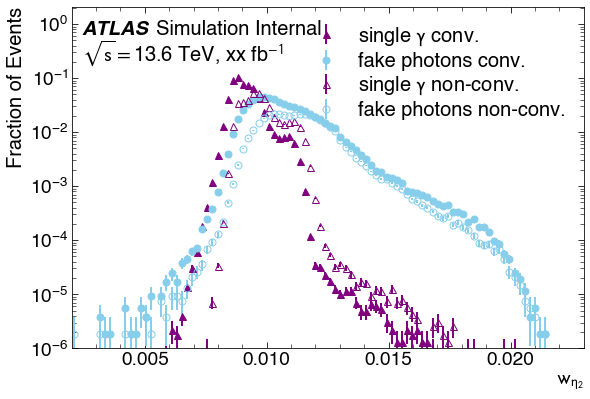

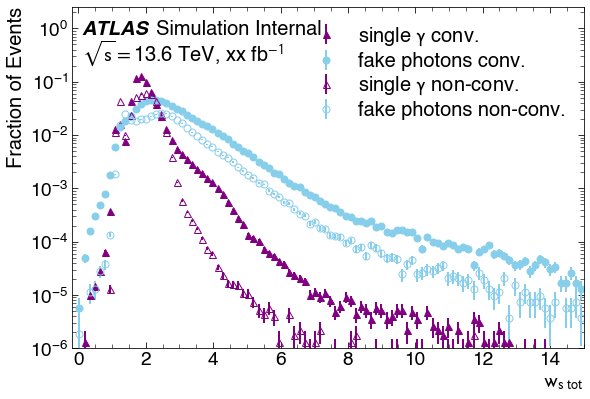

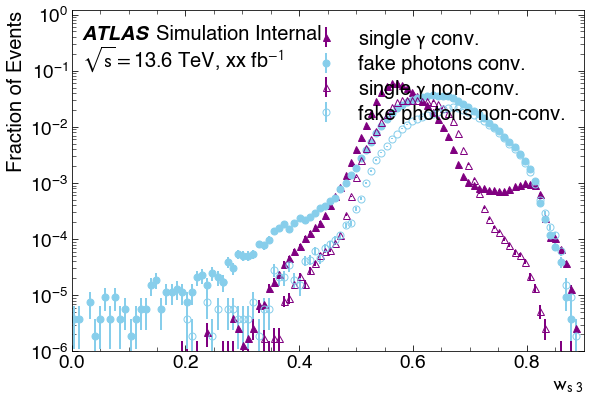

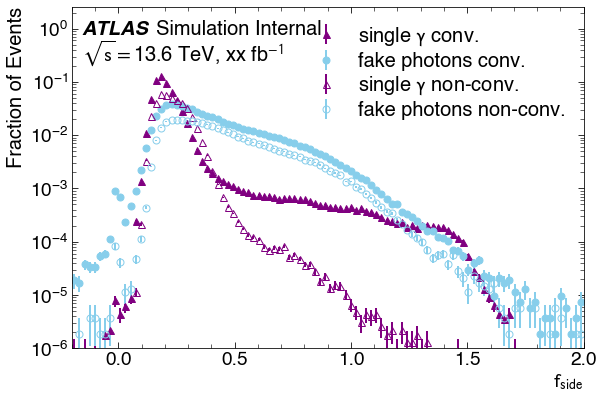

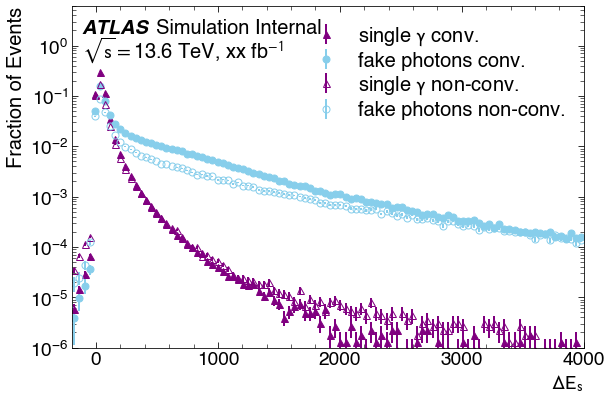

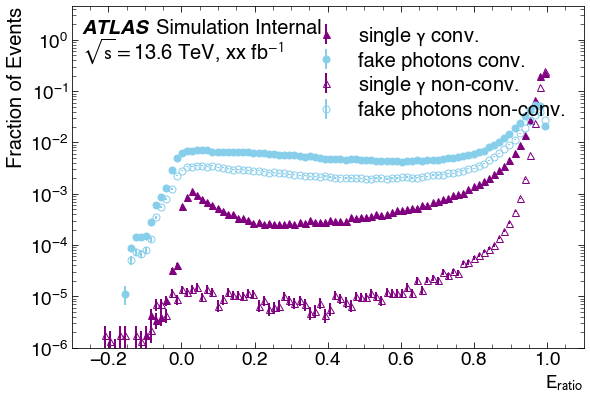

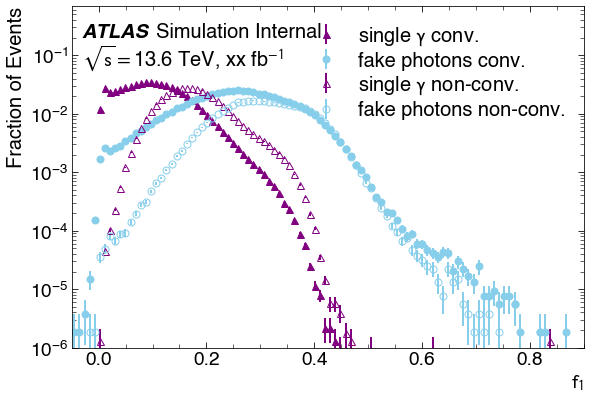

In [18]:
for i in range(len(branchlist)):
    branchname = branchlist[i]
    label = labellist[i]
    minmax = minmaxlist[i]
    hist1c = genmakebh('df_gj',branchname,minmax,boolslice='[df_gj.y_truth_convType == 0]')
    hist2c = genmakebh('df_jj',branchname,minmax,boolslice='[df_jj.y_truth_convType == 0]')
    hist1nc = genmakebh('df_gj',branchname,minmax,boolslice='[df_gj.y_truth_convType > 0]')
    hist2nc = genmakebh('df_jj',branchname,minmax,boolslice='[df_jj.y_truth_convType > 0]')
    ATLAShist4(hist1c,hist2c,hist1nc,hist2nc,label,minmax,'truthconv/convtru_'+branchname+'_totalnorm',totalnorm=True)
#     ATLAShist4(hist1c,hist2c,hist1nc,hist2nc,label,minmax,'truthconv/convtru_'+branchname)

In [14]:
genmakebh?

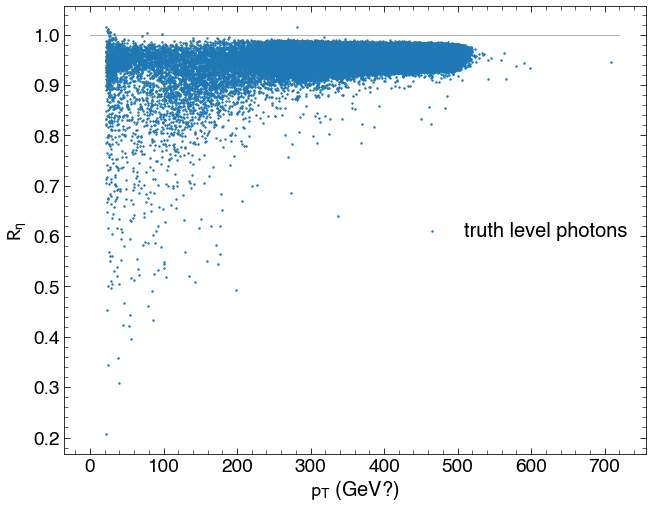

In [28]:
plt.scatter(df_gj.y_pt,df_gj.y_Reta,s=2,label='truth level photons') 
#make 2d historgam, log scaled (colour)
plt.plot([0,720],[1,1],c='k',linewidth=1,alpha=.3)
plt.xlabel(r'$p_T$ (GeV?)');plt.ylabel(r'$R_{\eta}$');plt.legend(loc='center right')

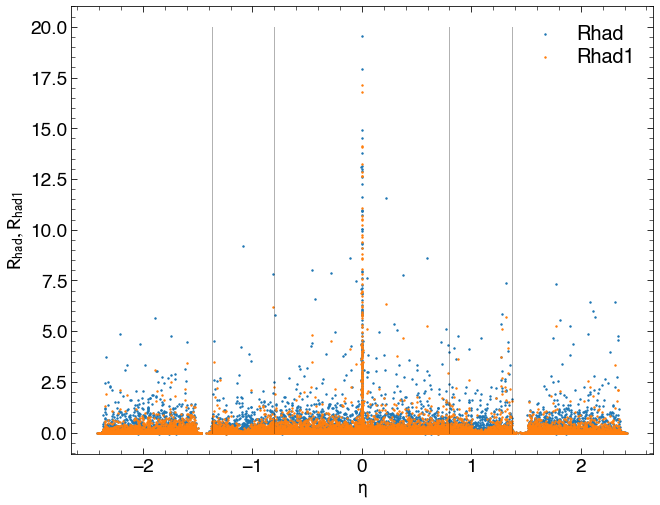

In [16]:
plt.scatter(df_gj.y_eta,df_gj.y_Rhad,s=2,label='Rhad')
plt.scatter(df_gj.y_eta,df_gj.y_Rhad1,s=2,label='Rhad1')

plt.plot([0.8,.8],[0,20],c='k',linewidth=1,alpha=.3)
plt.plot([1.37,1.37],[0,20],c='k',linewidth=1,alpha=.3)
plt.plot([-0.8,-.8],[0,20],c='k',linewidth=1,alpha=.3)
plt.plot([-1.37,-1.37],[0,20],c='k',linewidth=1,alpha=.3)

plt.xlabel(r'$\eta$');plt.ylabel(r'$R_{had},R_{had1}$');plt.legend()